In [1]:
push!(LOAD_PATH,"../src")
push!(LOAD_PATH,"../models/")

4-element Array{ByteString,1}:
 "/usr/local/share/julia/site/v0.4"
 "/usr/share/julia/site/v0.4"      
 "../src"                          
 "../models/"                      

In [2]:
using SGMCMC
using DataModel
using GaussianMixture
using MLUtilities
using Gadfly

In [3]:
dm = GaussianMixtureModel([-5,0,5],[1,1,1],[0.3,0.4,0.3])

GaussianMixture.GaussianMixtureModel([-5.0,0.0,5.0],[1.0,1.0,1.0],[0.3,0.4,0.3])

There's a gradient checking util - useful for implementing new models.

In [4]:
MLUtilities.checkgrad([.1],getllik(dm),getgrad(dm))

CheckGrad on logdensity with stepsize 1.0e-6


([-0.09998543553075698],[-0.09998593553106616])

Maximum difference: 5.000003091837346e-7
Mean difference:    5.000003091837346e-7


In [5]:
r = linspace(-7,7,1000); z = convert(Array{Float64},[getllik(dm)(x) for x in r]);

In [6]:
r;

In [7]:
exp(z);

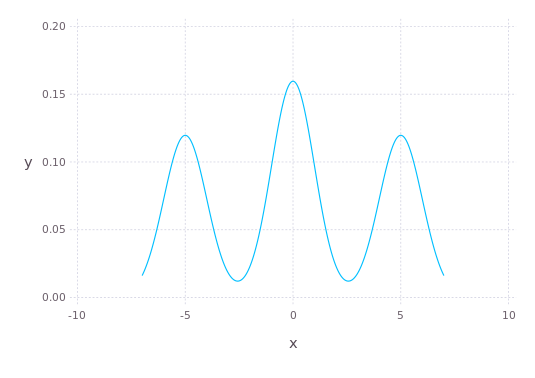

In [8]:
Gadfly.plot(x=r, y=exp(z), Geom.line)

In [9]:
function run(s::SamplerState,dm::AbstractDataModel;num_iterations=1000, final_plot=false)
    grad = getgrad(dm)
    llik = getllik(dm)
    samples = zeros(num_iterations, length(s.x))

    for i = 1:num_iterations

        sample!(s,llik,grad)

        samples[i,:] = s.x
    end
     
    if final_plot
        if length(s.x) == 2
            PyPlot.clf()
            llik(x,y) = llik([x,y])
            plot_contour(llik, -5:.05:6, -1:.05:32)
            PyPlot.scatter(samples[:,1], samples[:,2])
        end
    end

    samples
end

run (generic function with 1 method)

# HMC

In [10]:
shmc = HMCState([1.],stepsize = 0.1)

SGMCMC.HMCState([1.0],[-1.8904758475955263],0.1,10,[1.0])

In [11]:
samples = run(shmc,dm,num_iterations = 10000);

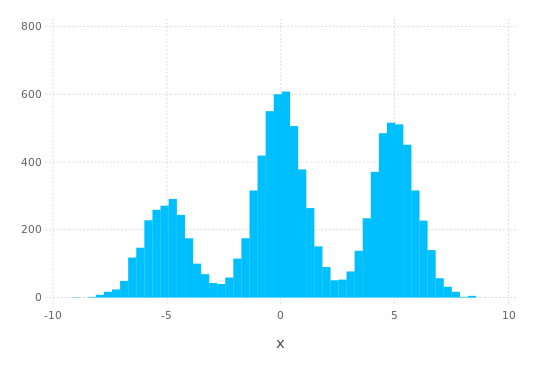

In [12]:
Gadfly.plot(x = samples, Geom.histogram(bincount=50))

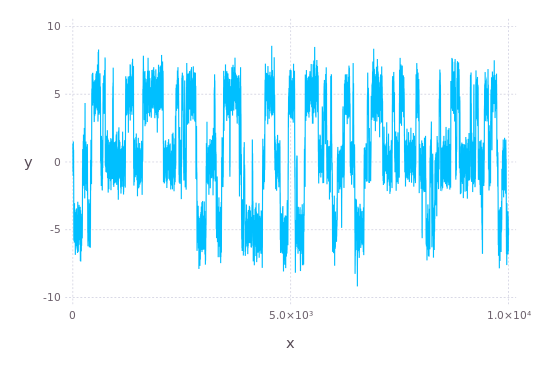

In [13]:
Gadfly.plot(x=1:length(samples), y=samples, Geom.line)

# Relativistic HMC

In [14]:
srhmc = RelHMCState([1.],stepsize=0.1)

SGMCMC.RelHMCState([1.0],[2.6749180106630064],0.1,10,1.0,[1.0])

In [15]:
samples = run(srhmc,dm, num_iterations = 10000);

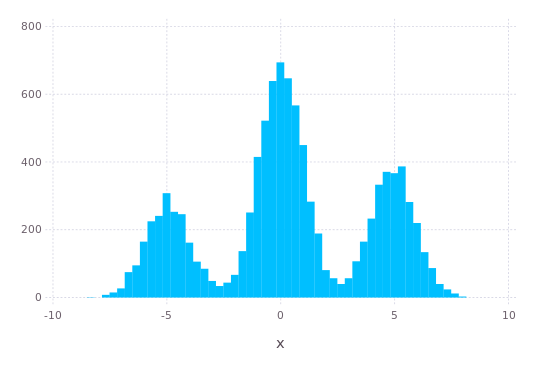

In [16]:
Gadfly.plot(x=samples, Geom.histogram(bincount
=50))

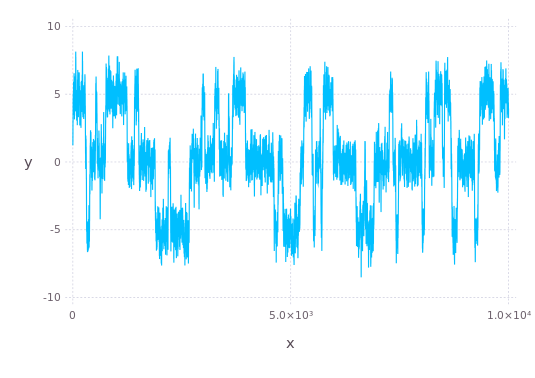

In [17]:
Gadfly.plot(x=1:length(samples), y=samples, Geom.line)